In [1]:
import numpy as np
import matplotlib.pyplot as plt
import movies_stats

In [2]:
id_movie_dict, category_lists = movies_stats.make_dict_and_cats()

In [3]:
data = np.genfromtxt("data.txt", dtype='int', delimiter='\t')

In [4]:
def plot_ratings_hist(ratings, title, xlabel='Rating', ylabel='Number of Ratings', fraction=False):
    ratings_hist, _ = np.histogram(ratings, bins=[1, 2, 3, 4, 5, 6])
    if (fraction):
        plt.bar(np.arange(1,6), ratings_hist / float(len(ratings)), align='center')
    else:
        plt.bar(np.arange(1,6), ratings_hist, align='center')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [5]:
def plot_ratings_pie(ratings, title, startangle=90):
    ratings_hist, _ = np.histogram(ratings, bins=[1, 2, 3, 4, 5, 6])
    plt.pie(ratings_hist, labels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'],
        autopct='%1.1f%%', startangle=startangle)
    plt.title(title + "\n")
    plt.axis('equal')
    plt.show()

In [6]:
# All Ratings Visualizations

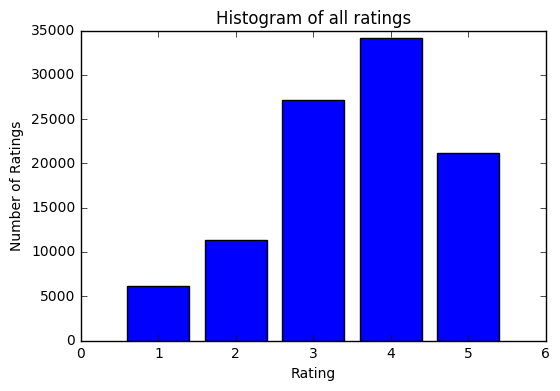

In [7]:
# histogram of all ratings
ratings = data[:, 2]
plot_ratings_hist(ratings, 'Histogram of all ratings')

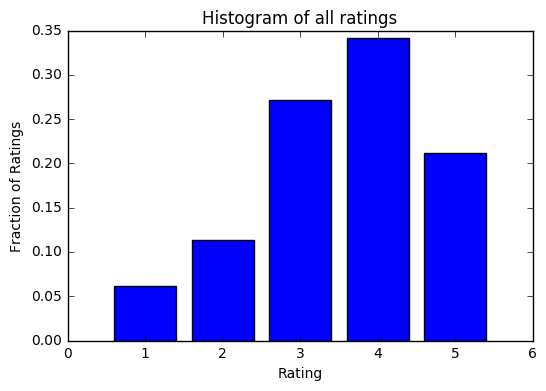

In [8]:
# histogram of all ratings - by %
plot_ratings_hist(ratings, 'Histogram of all ratings', ylabel='Fraction of Ratings',
                  fraction=True)

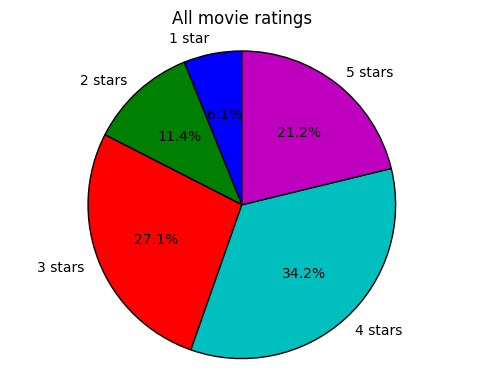

In [9]:
# pie chart of all ratings
plot_ratings_pie(ratings, "All movie ratings")

In [10]:
def plot_specific_movies_ratings(m_ids, data, title):
    ind_movie_ratings = {}
    ind_movie_hist = {}
    for i in m_ids:
        ind_movie_ratings[i] = data[np.where(data[:, 1] == i)[0], :]
        ratings = ind_movie_ratings[i][:, 2]
        ratings_hist, _ = np.histogram(ratings, bins=[1, 2, 3, 4, 5, 6])
        ind_movie_hist[i] = ratings_hist
        
    num_ratings_by_rating = {}
    for rating in [1,2,3,4,5]:
        lst = []
        for i in m_ids:
            lst.append(ind_movie_hist[i][rating-1])
        num_ratings_by_rating[rating] = lst
        
    ind = np.arange(1,11)  # the x locations for the groups
    width = 0.15       # the width of the bars

    color = 'rrymgb'
    fig, ax = plt.subplots()
    iter = 0
    rects_lst = []
    for i in [1,2,3,4,5]:
        rects = ax.bar(ind + width * iter,
                       num_ratings_by_rating[i],
                       width, color=color[i], align='center')
        rects_lst.append(rects)
        iter += 1

    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(map(int, m_ids))
    ax.set_xlabel('movie id')
    ax.set_ylabel('number of ratings')
    ax.legend(rects_lst, ["1 star", "2 stars", "3 stars", "4 stars", "5 stars"],
              loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [11]:
# Most popular ratings visualizations

In [12]:
popular_movie_ids = movies_stats.get_most_popular(10)
pop_indices = [i for i in range(data.shape[0]) if data[i, 1] in popular_movie_ids]
pop_data = data[pop_indices, :]
pop_ratings = pop_data[:, 2]

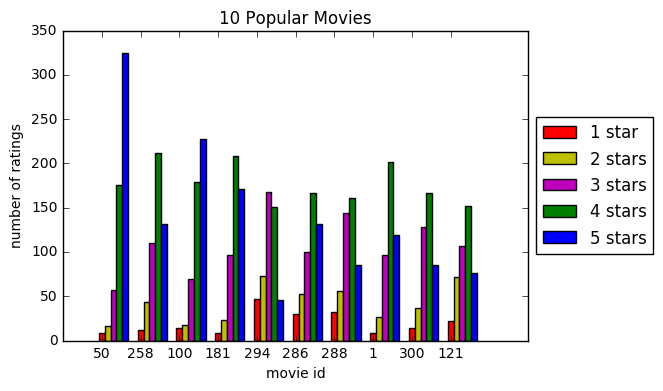

In [13]:
# Most popular movies - individual ratings
plot_specific_movies_ratings(popular_movie_ids, pop_data, "10 Popular Movies")

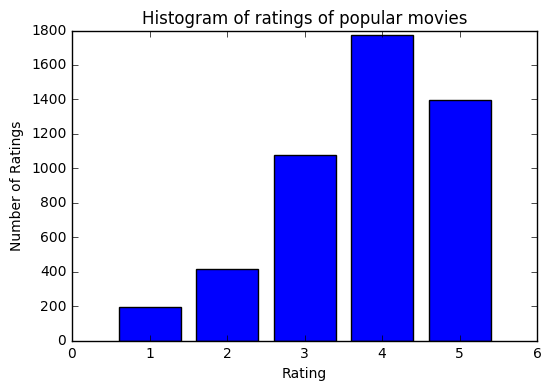

In [14]:
# histogram of ten most popular movies (most ratings)
plot_ratings_hist(pop_ratings, 'Histogram of ratings of popular movies')

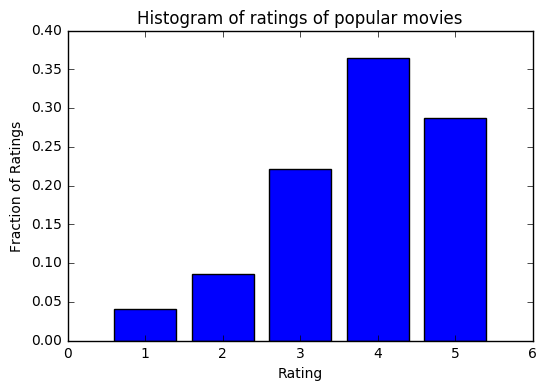

In [15]:
# histogram of ten most popular movies (most ratings) by %
plot_ratings_hist(pop_ratings, 'Histogram of ratings of popular movies',
                  ylabel='Fraction of Ratings', fraction=True)

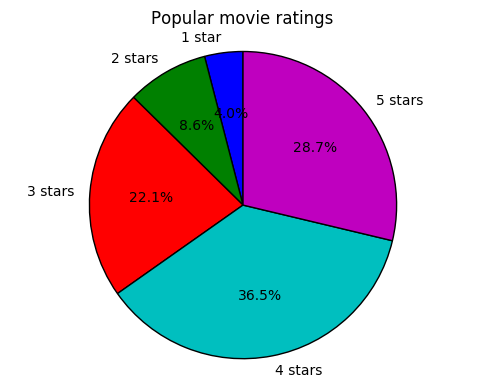

In [16]:
# pie chart of 10 most popular movies
plot_ratings_pie(pop_ratings, "Popular movie ratings")

In [17]:
# Best movies (most highly rated on avg, with at least 10 reviews) visualizations

In [18]:
best_movie_ids = movies_stats.get_highest_rated(10, 10)
best_indices = [i for i in range(data.shape[0]) if data[i, 1] in best_movie_ids]
best_data = data[best_indices, :]
best_ratings = best_data[:, 2]

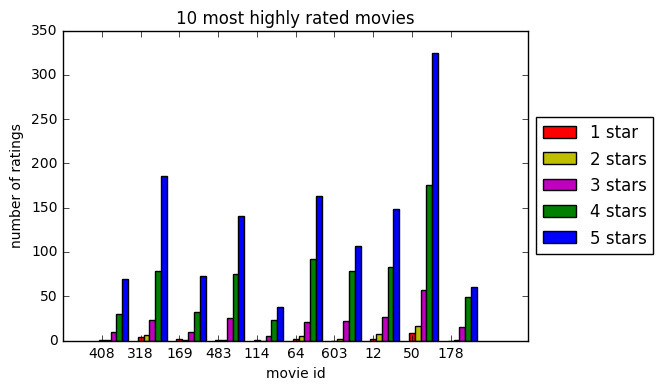

In [19]:
# Best movies - individual ratings
plot_specific_movies_ratings(best_movie_ids, best_data, "10 most highly rated movies")

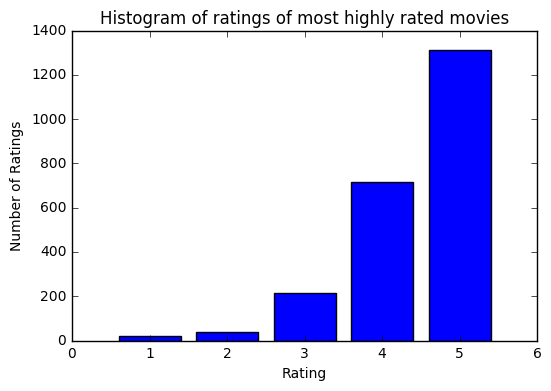

In [20]:
# Best movies - histogram
plot_ratings_hist(best_ratings, 'Histogram of ratings of most highly rated movies')

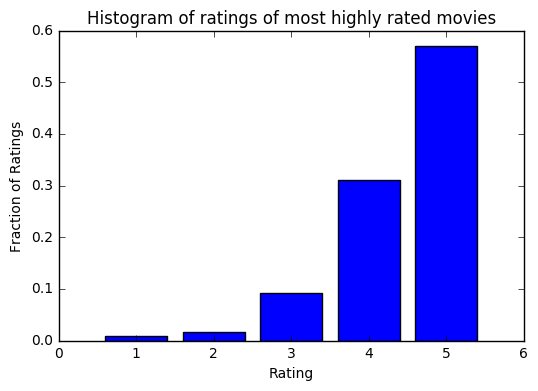

In [21]:
# Best movies - histogram by %
plot_ratings_hist(best_ratings, 'Histogram of ratings of most highly rated movies',
                  ylabel='Fraction of Ratings', fraction=True)

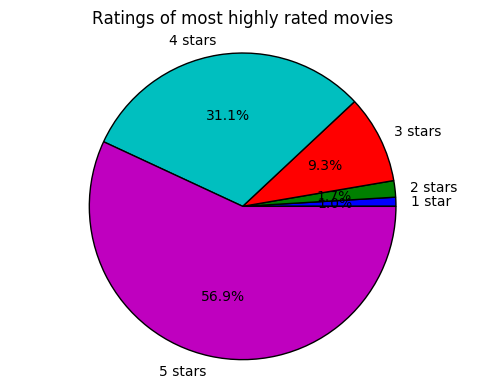

In [22]:
# Best movies - pie
plot_ratings_pie(best_ratings, "Ratings of most highly rated movies", startangle=0)

In [23]:
# Animation movies visualizations
animation_movie_ids = category_lists[3]
animation_indices = [i for i in range(data.shape[0]) if data[i, 1] in animation_movie_ids]
animation_data = data[animation_indices, :]
animation_ratings = animation_data[:,2]

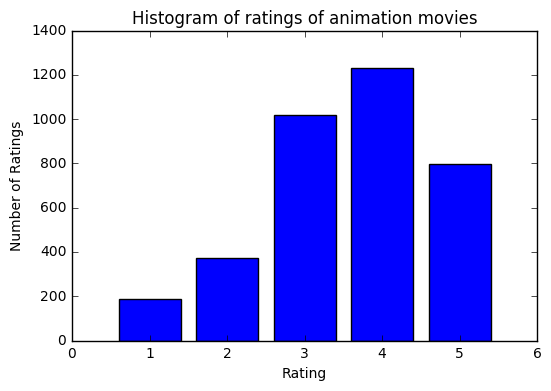

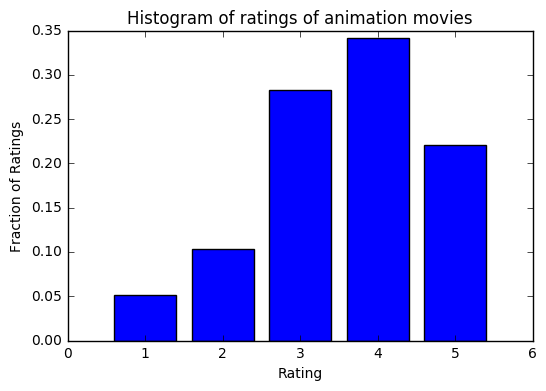

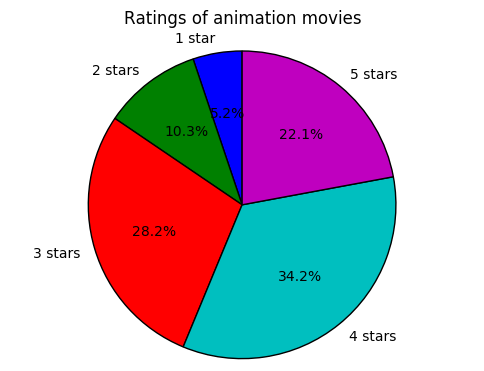

In [24]:
# Animation - histogram
plot_ratings_hist(animation_ratings, 'Histogram of ratings of animation movies')
# Animation - histogram by %
plot_ratings_hist(animation_ratings, 'Histogram of ratings of animation movies',
                  ylabel='Fraction of Ratings', fraction=True)
# Animation - pie
plot_ratings_pie(animation_ratings, "Ratings of animation movies")

In [25]:
# Documentary movie visualizations
documentary_movie_ids = category_lists[7]
documentary_indices = [i for i in range(data.shape[0]) if data[i, 1] in documentary_movie_ids]
documentary_data = data[documentary_indices, :]
documentary_ratings = documentary_data[:,2]

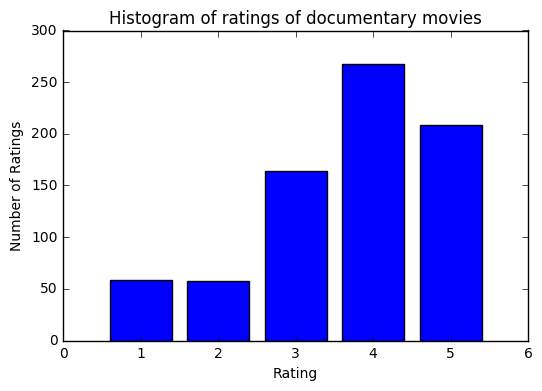

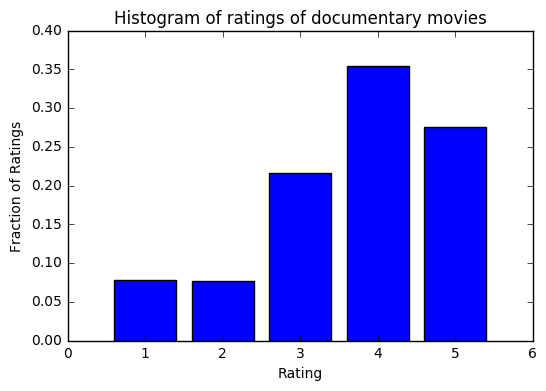

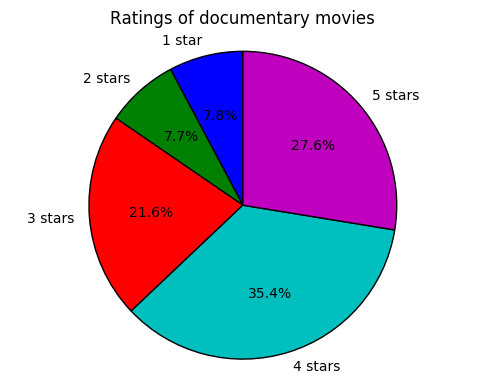

In [26]:
# Documentary - histogram
plot_ratings_hist(documentary_ratings, 'Histogram of ratings of documentary movies')
# Documentary - histogram by %
plot_ratings_hist(documentary_ratings, 'Histogram of ratings of documentary movies',
                  ylabel='Fraction of Ratings', fraction=True)
# Documentary - pie
plot_ratings_pie(documentary_ratings, "Ratings of documentary movies")

In [27]:
# Drama movies visualizations

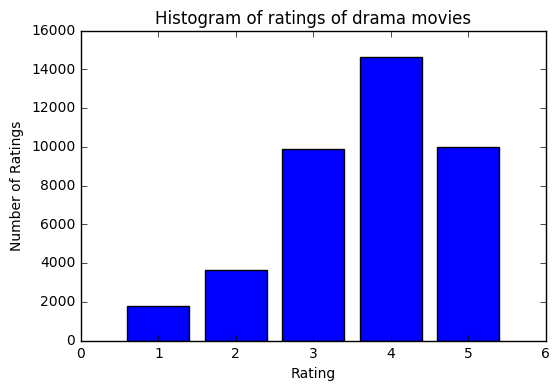

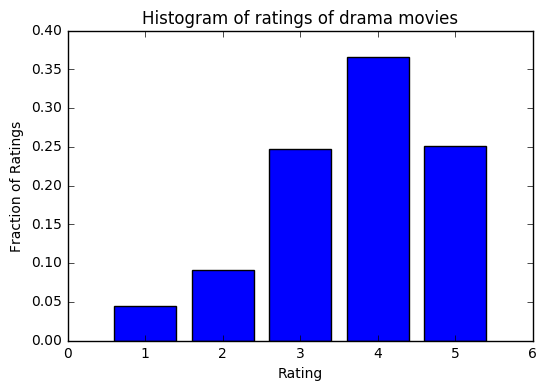

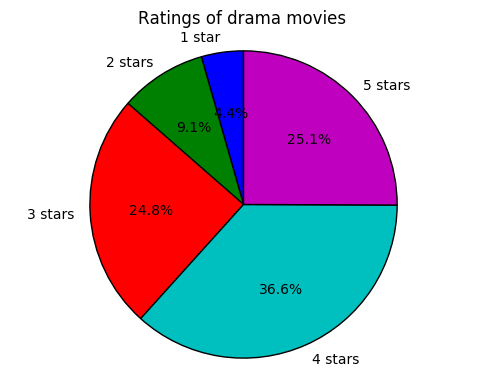

In [28]:
drama_movie_ids = category_lists[8]
drama_indices = [i for i in range(data.shape[0]) if data[i, 1] in drama_movie_ids]
drama_data = data[drama_indices, :]
drama_ratings = drama_data[:,2]
# Drama - histogram
plot_ratings_hist(drama_ratings, 'Histogram of ratings of drama movies')
# Drama - histogram by %
plot_ratings_hist(drama_ratings, 'Histogram of ratings of drama movies',
                  ylabel='Fraction of Ratings', fraction=True)
# Drama - pie
plot_ratings_pie(drama_ratings, "Ratings of drama movies")